# Assignment 18: A Taste of Matplotlib #

### Goals for this Assignment ###

By the time you have completed this assignment, you should be able to:

- Use `import` to make a software library available for use
- Use Matplotlib's `hist` function in order to plot a histogram
- Use the `bin` parameter of `hist` to adjust the number of bins used for histograms
- Use Matplotlib's `plot` function in order to plot a line graph
- Use Matplotlib's `scatter` function in order to plot a scatter plot
- Use Matplotlib's `subplots` function, along with the `set_xticks` and `set_yticks` methods, to create a scatter plot with specific ticks drawn along the axes

## Step 1: Make a Histogram of Randomly-Generated Integers ##

### Background: Software Libraries and `import` ### 

A [_library_](https://en.wikipedia.org/wiki/Library_(computing)) is code that is written in a given language which generally:

1. Does something useful
2. Is packaged and distributed in a way that other programmers can use the code

For example, for awhile now you have been writing functions which can do a variety of things.
If you wanted to share this code with others in a way that they can immediately use, you may wish to package that in a library and distribute it.

When it comes to language design, libraries allow one to offload work that the language itself needs to do to programs written in that language.
It is very common for programming languages themselves to try to have a somewhat minimal design, but to augment them with libraries that provide functionality that people expect and need.
Usually languages even come pre-packaged with a library, which is usually referred to as the _standard library_ for whatever the language is.

Python is no exception to this.
You've actually seen this already in practice, specifically in assignment 7, though it was not explained at that point.
In that case, we needed to compute the square root of something.
In order to do that, you saw code like the following:

In [1]:
import math

print(math.sqrt(4)) # computes the square root of 4

2.0


Importantly, in order to compute square root, we had to proceed this with `import math`.
The `import` statement in Python says that we want to use a library, and all libraries need a name.
In this case, with `import math`, we are saying we want to import the `math` library.
This will cause Python to look for a library named `math` in some standard locations; this search can be configured, though we won't get into details here.
If Python finds such a library, it will put it into scope with a variable of the same name.
The variable itself holds a reference to a _module_, which is an object representing a handle on the library itself.
From here, you can call anything defined in the library, in this case the `sqrt` method via `math.sqrt`.

Sometimes you don't want the variable holding the module to have the same name as the library.
For example, if you already have a variable with the same name in scope, you'll need a different name, or at least you'll need to rename the variable you already have.
As another example, the name of the library may be somewhat large, and you want to avoid retyping the whole name of the library every time you use something from it.
Even if the library name is fairly short, if you use the library a lot in your code, it may still be worth shrinking the name.
For these reasons, Python allows you to give the variable a different name using `as`, like so:

In [2]:
import math as m

print(m.sqrt(16)) # computes square root of 16

4.0


As shown in the prior code snippet, our handle on the math library is now just `m`, instead of `math`.
This means we can now call `m.sqrt` instead of the larger `math.sqrt`.

Importing a library with `as` is so common that sometimes the community around a given library defines preferred names, by convention.
For example, in this assignment, we'll be using the [matplotlib library](https://matplotlib.org/).
Matplotlib is an enormous library, so large in fact that it is better seen as a collection of smaller libraries.
Specifically, it is structured as having one large module with many smaller modules defined inside of it (and some of those have their own submodules).
One particular submodule, `matplotlib.pyplot`, is so commonly used, that the community using matplotlib has collectively decided that the variable holding the handle on this module should be named `plt`.
That is, prorgrammers are strongly preferred to do:

```python
import matplotlib.pyplot as plt
```

Note that this is entirely a convention, much like snake case vs. camel case for different kinds of names.
Neither Python itself nor matplotlib will enforce that you follow this convention.
However, it is _strongly_ encouraged to follow such conventions, because they make your code easier to read for others; programmers generally expect that other programmers follow the same conventions, and this can simplify the understanding of code.

This whole separation between language and library admittedly creates some extra complexity for the programmer.
Programmers now need to use `import`, meaning more code needs to be written.
For anything but the standard library, programmers also need to install any needed libraries, and this installation can be non-trivial.
(I'll openly admit that getting matplotlib working on my system took more work than I originally expected, and I needed to experiment a bit before I was confident it was working correctly.)
However, the advantages of libraries in practice dramatically outweigh the disadvantages.
This allows libraries to be developed fairly independently from the language itself, allowing for a good separation of concerns (e.g., developers working on the Python language itself don't need to be concerned with what you do with your particular library).
This makes it easier for people to write libraries.
This applies even to the standard library to some degree; for example, the code Python developers likely don't need to concern themselves with the details of `sqrt`, which can be handled by a separate development team.
This separation of concerns also means that you only need to download and install the specific libraries you need for your task.
This is important considering that libraries can be very large.
You likely don't have enough disk space for every Python library in existence, but that's ok because at any given point you'll only be using a sliver of all the Python libraries available, and only that sliver of libraries needs to live on disk.

In practice, the biggest reason why software developers choose a given language doesn't have to do with the language at all, but rather the libraries available in the language; this was demonstrated by [this research paper](https://lmeyerov.github.io/projects/socioplt/papers/oopsla2013.pdf).
(The paper is linked just in case you're curious, and it's not expected that you'd look it over.)
The biggest reason why Python is used so much for data science is because there are very good libraries available for doing data science in Python.
While this doesn't explain why Python initially became entrenched in data science, it ends up being a self-reinforcing positive feedback loop: because the libraries are good, more people use Python for data science.
With more demand for those libraries, the libraries themselves improve and add functionality, which in turn draws more people to using Python for data science.

### Matplotlib Background and Caveat: This is Only a Taste ###

[Matplotlib](https://matplotlib.org/) is a Python library for producing chart-oriented visualizations of data.
For example, matplotlib can be used to make line graphs, histograms, scatter plots, box plots, and many, many others.
While other tools (e.g., Microsoft Excel) can be used to make a number of charts, matplotlib is fairly unique in that:

- It is very comprehensive.  As shown [here](https://matplotlib.org/stable/gallery/index.html), there are hundreds of _kinds_ of plots you can make.  While other tools can make some of these, matplotlib is about the only game in town that supports so much.
- Because it is a software library, it is fully programmable, unlike with a standalone tool.  This gives the programmer an enormous amount of control over what can be made, perhaps moreso than any other tool.
- Because it is a software library, it can be integrated into an analysis very directly.  You don't need to do a separate phase to export your analysis results to a file and then read that file with another tool; you can instead do the entire analysis and the visualization of the results in the same program.

For these reasons, other than Excel, matplotlib is the most well-known tool for making charts.
However, these advantages are a double-edged sword, because this also means:

- There is so much functionality available that it can easily become overwhelming, especially if you try to exhaustively understand the whole library.
- While you can be reasonably confident that there is a way to do whatever you want, knowing _how_ to do that is an entirely different problem.
- Because it's a software library, this gates out people without programming skills.  As testament to how big of an issue this is, we are now on assignment 18 before actually getting to the first data science library we will cover, as it took that much background on Python before you could reasonably understand matplotlib basics.

With all this in mind, there is a very important caveat with this assignment, which also applies to the other data science libraries we will use: we will only be scratching the surface here.
The goal is to get you just familiar enough that you can go deeper yourself as you need.
For most software libraries this is a completely normal attitude; it is usually not realistic to understand the whole library (it is, after all, called a _library_, not a book).
For example, looking at the source code of matplotlib as of this writing (available [here](https://github.com/matplotlib/matplotlib), if you're curious), it consumes 546 megabytes on disk, and it defines 15,656 Python functions/methods.
You will very likely never use most of these functions/methods, and that's perfectly normal.
On the flip side, you will likely use a handful of these functions/methods a lot; this is also typical.
This phenomenon is because the library is super general, but you will only use it for whatever you need it for, which likely won't cover most of its functionality.

### Background: Randomly-Generated Numbers ###

We've previously seen `math`, which is one of the libraries that comes pre-packaged with Python.
For this step, we will use another pre-packaged library: `random`.
`random` is used to generate [_pseudorandom numbers_](https://en.wikipedia.org/wiki/Pseudorandom_number_generator), and the `randint` method specifically can be used to generate a random integer in a given inclusive range.
This is demonstrated below in the next cell.

In [3]:
import random

print(random.randint(-3, 5)) # prints some integer in the range [-3, 5]

-2


The output of the above cell won't remain constant if you run it enough times.
While it's possible to get the same output more than once, you are very unlikely to see the same result over and over again.

In reality, while the numbers will appear completely random to a casual observer, given some prior information, it's possible to determine exactly what the next number generated will be; this is why the numbers are said to be _pseudorandom_.
The reasons why are beyond our scope, but you should know that there are many different algorithms for generating random numbers, and Python's `random` is using just one of many.
Such algorithms are responsible for randomness in video games, and in that space their predictability can be exploited by [speedrunners](https://en.wikipedia.org/wiki/Speedrunning) to accurately predict what "random" decision a game will make.

For our purposes, in this assignment we will use randomly-generated numbers to generate some data that we can plot.
This will allow us to focus on matplotlib itself.
In a more realistic scenario, we'd be more likely to load data from another source (likely using the file I/O seen in the prior assignment), and then plotting that.
You'll do that for the project.

For our our purposes, for the rest of the assignment we need two lists of randomly-generated integers of the same length.
The cell below will do just that, naming the lists `integers1` and `integers2`:

In [5]:
import random

def make_integers(low_end, high_end, num_numbers):
    return [random.randint(low_end, high_end) for _ in range(num_numbers)]

integers1 = make_integers(-100, 100, 100)
integers2 = make_integers(-10, 10, 100)

print(integers1)
print(integers2)

[55, -3, 74, 100, -17, 54, 28, -80, -47, 21, 18, 73, -65, -29, -72, -36, -29, -97, -63, -43, 78, 24, -42, 38, 1, 31, -3, -10, -95, -40, -2, -92, -24, -36, 92, -11, -84, 75, -6, 60, 36, 63, 35, 51, 30, -99, -68, -82, 56, 41, 3, -5, -81, 27, 39, -92, 67, 42, 3, 63, 79, 88, 1, 82, -16, 44, -98, -99, 23, 99, -48, 7, -5, -16, -66, 66, -33, -5, 77, 73, -7, -42, -1, 74, 33, 22, 54, 80, -76, 46, 100, -74, -77, 4, 9, -9, -47, 20, 51, -12]
[-2, 6, -6, 10, -8, 10, 10, -8, 8, -6, 5, -10, 2, 3, -7, -7, -6, -4, -8, -7, 2, -5, -10, 9, -1, 10, -8, 1, 2, 7, -2, 6, -9, 1, 0, 8, 3, -7, -7, -3, 3, -8, -9, -8, 7, -10, 7, -1, 1, -4, -10, -5, -4, 1, -10, 4, 2, 3, 5, -1, -8, 8, 6, -9, 7, 10, 9, -3, -9, -4, -3, -10, 2, 6, -8, -3, 5, 5, -4, 4, -3, -5, -2, -2, 1, 6, -7, -7, 3, -10, -1, 1, -6, -9, 6, 0, -7, -3, -4, 8]


As shown above, the `make_integers` function will create integers within a given range `[low_end, high_end]`, and it will create a list of such integers of length `num_numbers`.
`integers1` is made of integers in the range `[-100, 100]`, and `integers2` is made of integers in the range `[-10, 10]`.
Both `integers1` and `integers2` have length `100`.

### Background: Making Histograms in matplotlib ###

To make a histogram in matplotlib, we first need to `import` matplotlib, and then call the `hist` method with the data we want to 
The next cell does exactly that:

(array([1., 0., 2., 0., 0., 0., 0., 3., 2., 1.]),
 array([2. , 2.7, 3.4, 4.1, 4.8, 5.5, 6.2, 6.9, 7.6, 8.3, 9. ]),
 <BarContainer object of 10 artists>)

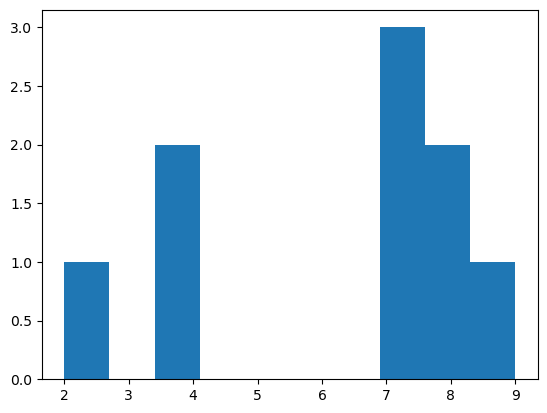

In [6]:
import matplotlib.pyplot as plt

plt.hist([4, 2, 8, 7, 4, 9, 8, 7, 7])

The prior cell should produce output that looks like the following image (note you'll need to download this from Canvas into the same directory as `18_taste_of_matplotlib.ipynb` in order for this to display correctly):

![hist_expected](hist_expected.png)

If this is not the output you see (including the histogram image itself), then you may need to add some code before the `import matplotlib.pyplot as plt` line in order to setup matplotlib correctly.
Exactly what you need to add is unfortunately dependent on your setup, and you may need to download something else.
(I wish I could be more helpful, but I only have one particular setup I can test things with, and I needed to do a fair amount of experimentation before I got it working.  All I can say is that none of the suggestions in McKinney Chapter 9 worked on my system.)
I can say that adding one of the following lines may fix things:

- `%matplotlib inline`
- `%matplotlib notebook`
- `%matplotlib ipympl`

You alternatively could use [JupyterLab](https://jupyter.org/try) or [Google Colab](https://colab.research.google.com/), which should have functional setups out of the box.

Assuming the prior cell worked correctly, you should see a number of bars in the histogram, where the height of the bar indicates how frequently the given number (showed on the X axis) appeared in the input.
Note that matplotlib automatically set the scale of the X and Y axes based on the data itself.

### Try this Yourself ###

In the next cell, make a histogram of the data in `integers1`.
Be sure to run the cell defining `integers1` beforehand.
If you ran the prior cell importing matplotlib, you shouldn't need to run it again.

(array([11.,  8.,  7.,  6., 16.,  9., 13., 11., 13.,  6.]),
 array([-99. , -79.1, -59.2, -39.3, -19.4,   0.5,  20.4,  40.3,  60.2,
         80.1, 100. ]),
 <BarContainer object of 10 artists>)

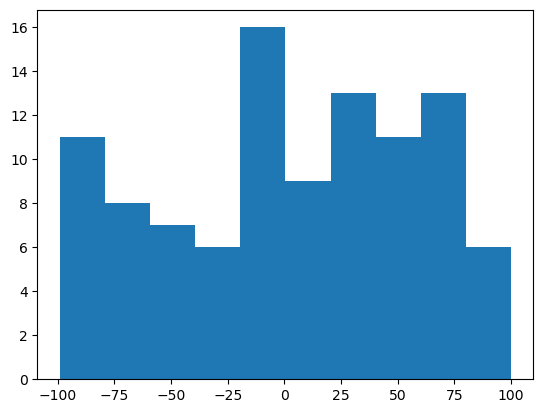

In [7]:
# write the code needed to make a histogram of integers1
# this should only need to be one line
plt.hist(integers1)

### Step 2: Adjust the Number of Bins Used ###

From the prior step, you should see that matplotlib divided up the space of numbers into ten bins.
This follows from the fact that, when generating 100 integers in the range `[-100, 100]`, the probability of generating the same integer more than a handful of times is fairly low.
If you binned based solely on the individual number, you'd see 201 separate bins, and most of them would contain either 0 or 1 number.
As a result, matplotlib instead chose to define ten separate bins, and each bin holds the numbers falling into a particular range.
This is a generalization of putting each distinct number into its own bin; now instead of the ranges being so narrow that only a single number fits into a bin, we've expanded the range enough that multiple numbers exist in the same bin.

Herein lies something that's both a good thing and a bad thing about matplotlib: to some degree, when plotting, it tries to figure out what you want, largely based on the data itself.
201 separate bins is _probably_ not what you wanted, so instead it chose this layout.
On the X axis, matplotlib didn't bother showing anything outside of the range `[-100, 100]`, because none of the data points were outside of that range.
While this still might not be what you want (the bad part), the good part is that we didn't need to specify an army of parameters before we could plot anything.
To give a sense of how important this is, the snippet below was taken from the [documentation for `hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html), which shows the parameters that `hist` takes:

```python
matplotlib.pyplot.hist(x, bins=None, *, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, data=None, **kwargs)
```

Looking through these, we can see that there are, in fact, 15 optional keyword parameters, which are all used to adjust various aspects of what `hist` does.
It's even worse that this, because this is really only covering parameters specific to `hist`; the `**kwargs` part at the end means that any remaining keyword parameters are grouped into a dictionary internally, where the keys are the keywords themselves, and the values are whatever was passed for these keywords.
This means that there are very likely additional parameters which work for any plot, not just `hist`.

Most of the parameters have default values of `None`, which is an object in Python that doesn't particularly do much of anything interesting.
It's really more of an indicator (or more properly, a _flag_) to indicate that someone has not passed anything in for this parameter.

If you actually try to understand how every one of these parameters works, you'll very quickly get overwhelmed.
However, the key insight is that you only need to bother with whatever you need to tweak for what you want to do right now.

For this step, we will consider just one of these optional keyword parameters: `bins`.
`bins` allows the caller to set exactly how many bins will be used.
An example is provided in the next cell:

(array([1., 2., 3., 3.]),
 array([2.  , 3.75, 5.5 , 7.25, 9.  ]),
 <BarContainer object of 4 artists>)

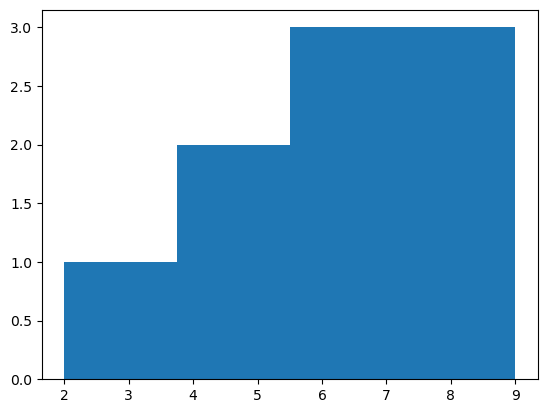

In [8]:
plt.hist([4, 2, 8, 7, 4, 9, 8, 7, 7], bins=4)

This example takes the data from the first histogram, and forces there to be four bins.
Matplotlib then divided this data into four bins, specifically one for values 2-3, another for 4-5, another for 6-7, and the last one for 8-9.

### Try this Yourself ###

In the next cell, make a histogram of the data in `integers1`, but put all the data into 5 bins.
Be sure to run the cell defining `integers1` beforehand.
If you ran the prior cell importing matplotlib, you shouldn't need to run it again.

(array([19., 13., 25., 24., 19.]),
 array([-99. , -59.2, -19.4,  20.4,  60.2, 100. ]),
 <BarContainer object of 5 artists>)

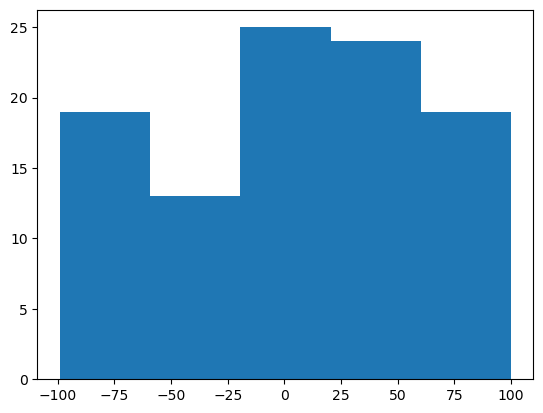

In [9]:
# write the code needed to make a histogram of integers1, putting all data into 5 bins
# this should only need to be one line
plt.hist(integers1,bins=5)

## Step 3: Make a Line Graph of Sorted Randomly-Generated Integers ##

### Background: `plot` Method for Line Graphs ###

The `plot` method can be used to generate a line graph.
For example:

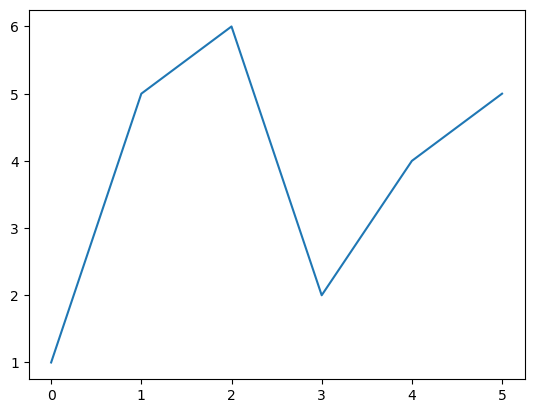

In [10]:
plt.plot([1, 5, 6, 2, 4, 5])

Each index of the provided list is used for the X axis of the graph, and the value at the index is used for the Y axis of the graph.

### Try this Yourself ###

Now create a line graph of the _sorted_ contents of `integers1`.
Your code should not modify `integers1` itself.
As a hint, you may find `sorted` helpful.

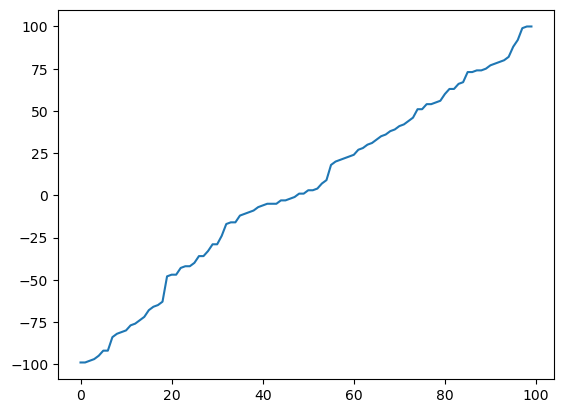

In [11]:
# write the code needed to make a line graph of integers1, but sorted.
# your code should not modify integers1
# this should only need to be one line
plt.plot(sorted(integers1))

## Step 4: Make a Scatter Plot of Randomly-Generated Integers ##

### Background: `scatter` Method for Scatter Plots ###

Matplotlib's [`scatter` method](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) can be used to generate 2D scatter plots.
Because each point in a 2D scatter plot needs an X and a Y coordinate, `scatter` actually takes two lists of equal length.
The first list is that of X coordinates, and the second is a list of Y coordinates.
Each point is distinguished then by index.
This is all illustrated in the cell below:

In [ ]:
plt.scatter([3, 7, 4], [8, 9, 0])

As shown, there is a point at `(3, 8)` (corresponding to index `0`), a point at `(7, 9)` (corresponding to index `1`), and a point at `(4, 0)` (corresponding to index `2`).

### Try this Yourself ###

In the next cell, create a scatter plot of the randomly-generated integers you previously made, where `integers1` holds the X coordinates, and `integers2` holds the Y coordinates.
You will likely not notice any trends, given that the data is randomly-generated.

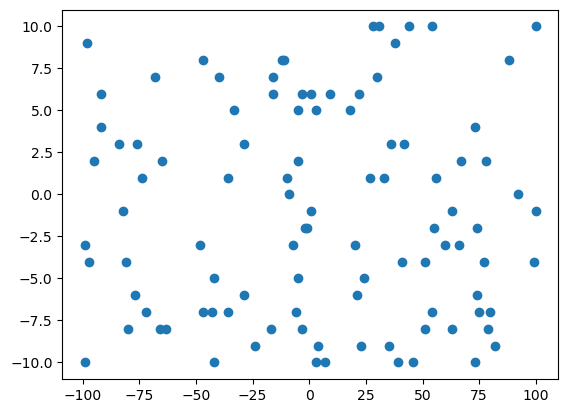

In [13]:
# write the code needed to make your scatter plot here
# this should only need to be one line
plt.scatter(integers1,integers2)

## Step 5: Adjust the Ticks and Labels for the X and Y Axes of the Scatter Plot ##

### Background: Setting the Ticks Used in a Scatter Plot ###

From the scatter plot used as an example in the prior step, you may have noticed that the choices of the _ticks_ for both the X and Y axes were a little odd.
Specifically:

- The tick marks for the X axis were in floating-point values, despite the fact that all of our data points consisted of integers
- The last tick mark on the Y axis was `8`, despite the fact that the data went up to `9`

We can manually specify which tick marks should be used as follows:

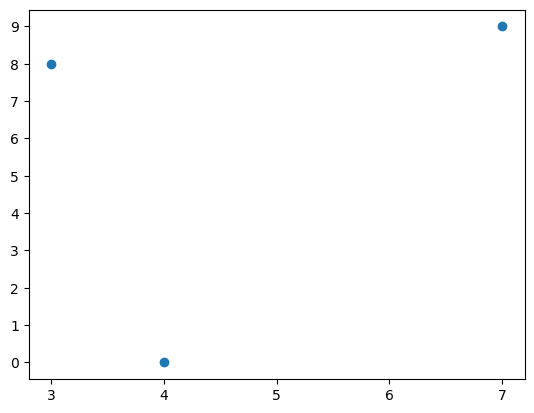

In [14]:
fig, ax = plt.subplots()
ax.set_xticks(list(range(3, 8))) # list passed: [3, 4, 5, 6, 7]
ax.set_yticks(list(range(0, 10))) # list passed: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
ax.scatter([3, 7, 4], [8, 9, 0])

To break this code down line-by-line, mathplotlib's [`subplots`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) method creates a _figure_ and set of _subplots_, and returns this as a tuple.
We then immediately destruct this tuple into `fig` and `ax`, respectively.
These names themselves are very common throughout matplotlib's documentation, and form a programmer convention.

McKinney chapter 9.1 goes into more detail with these, but the idea is that matplotlib allows you to define a single image (a figure) which contains one or more plots (subplots) inside of it.
Everything up until this point created a single figure with a single subplot.
In this case, we are calling `subplots` first because this gives us an [`Axes`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html) object (bound to `ax`), which has a variety of methods on it which can be used to customise how a given plot looks.
In this case, we specifically want top adjust what ticks are used for the X and Y axes, and so we call the `set_xticks` and `set_yticks` methods, respectively.
Both of these methods take a list of values which will be used as the ticks.
From there, we actually make the scatter plot with `ax.scatter`.
Note that this call to make the scatter plot is _different_ from what we used in the prior step; we are now making the scatter plot with respect to the specific `ax` object we just setup with our custom tick marks, as opposed to making any old scatter plot with whatever the defaults are (the prior `plt.scatter`).

### Try this Yourself ###

In the cell below, create another scatter plot of `integers1` and `integers2`, similar to what you did for the prior step.
However, set the tick marks for the X axis to be `-100` to `100` in increments of `20` (e.g., `-100`, `-80`, ..., `80`, `100`).
For the Y axis, set the tick marks to be `-10` to `10`, in increments of `2` (e.g., `-10`, `-8`, ..., `8`, `10`).

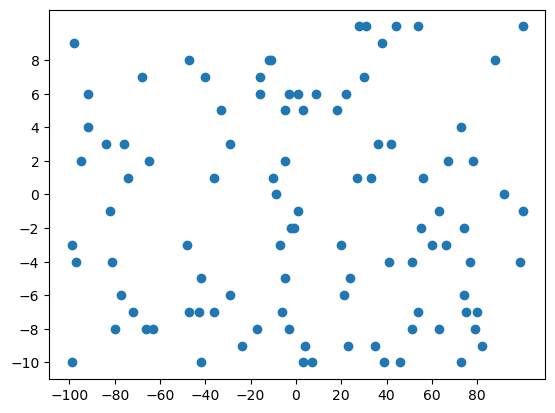

In [19]:
# write the code needed to make your scatter plot with custom tick marks here
# you should need multiple lines in order to accomplish this
fig, ax = plt.subplots()
ax.set_xticks(list(range(-100, 100,20)))
ax.set_yticks(list(range(-10, 10,2))) 
ax.scatter(integers1,integers2)

## Step 6: Submit via Canvas ##

Be sure to **save your work**, then log into [Canvas](https://canvas.csun.edu/).  Go to the COMP 502 course, and click "Assignments" on the left pane.  From there, click "Assignment 18".  From there, you can upload the `18_taste_of_matplotlib.ipynb` file.

You can turn in the assignment multiple times, but only the last version you submitted will be graded.